In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
cdata = pd.read_csv('Mall_Customers.csv')

In [4]:
cdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
cdata.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X=cdata.drop(columns=['CustomerID','Gender','Age'],axis=1).values

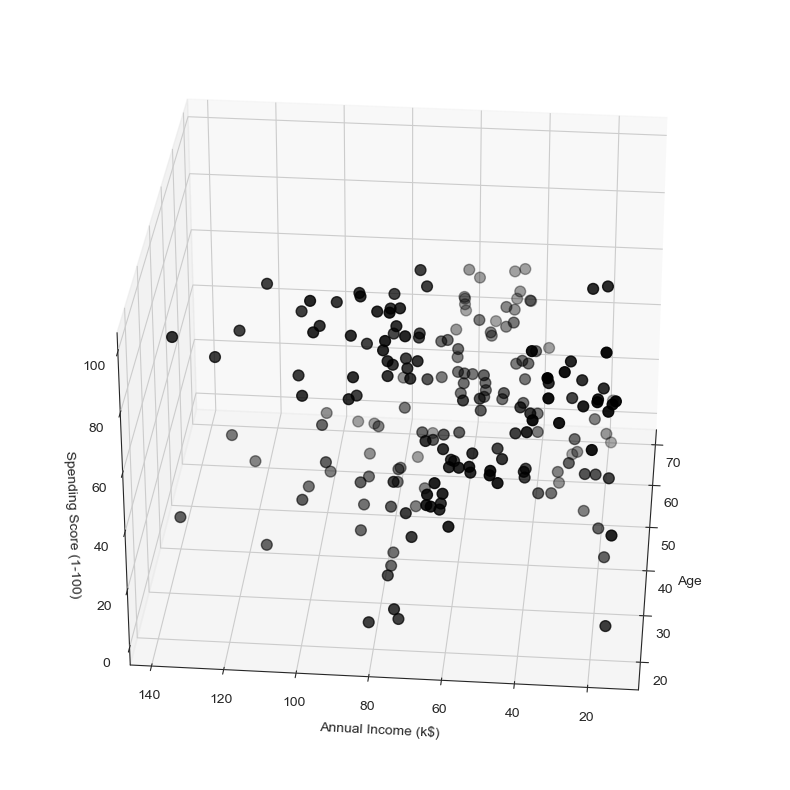

In [15]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cdata.Age, cdata["Annual Income (k$)"], cdata["Spending Score (1-100)"], c='black', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

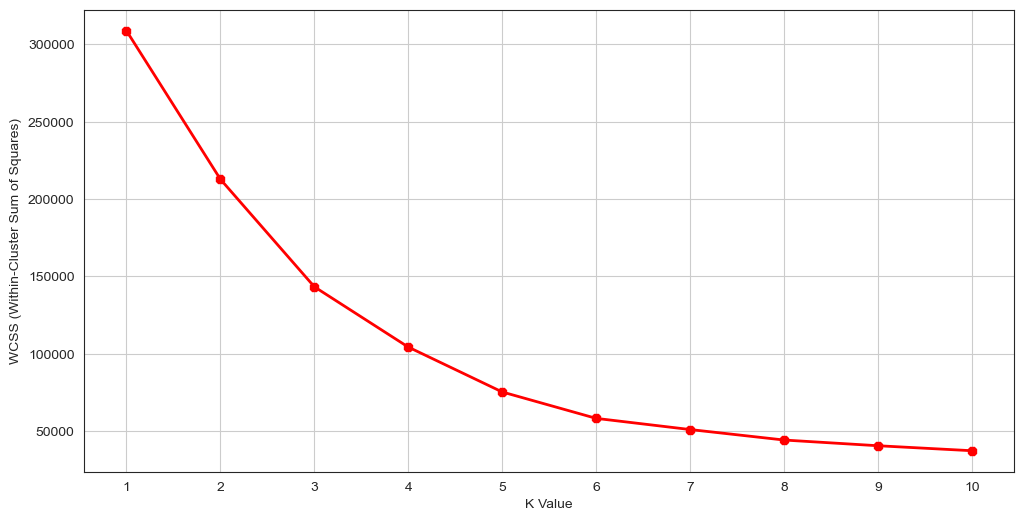

In [40]:
cdata_numeric = cdata.iloc[:, 1:].select_dtypes(include=[np.number])

if cdata_numeric.isnull().sum().sum() > 0:
    cdata_numeric = cdata_numeric.dropna()
    
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(cdata_numeric)
    wcss.append(kmeans.inertia_)

import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

# Plot the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [31]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
Y = kmeans.fit_predict(X)

In [32]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

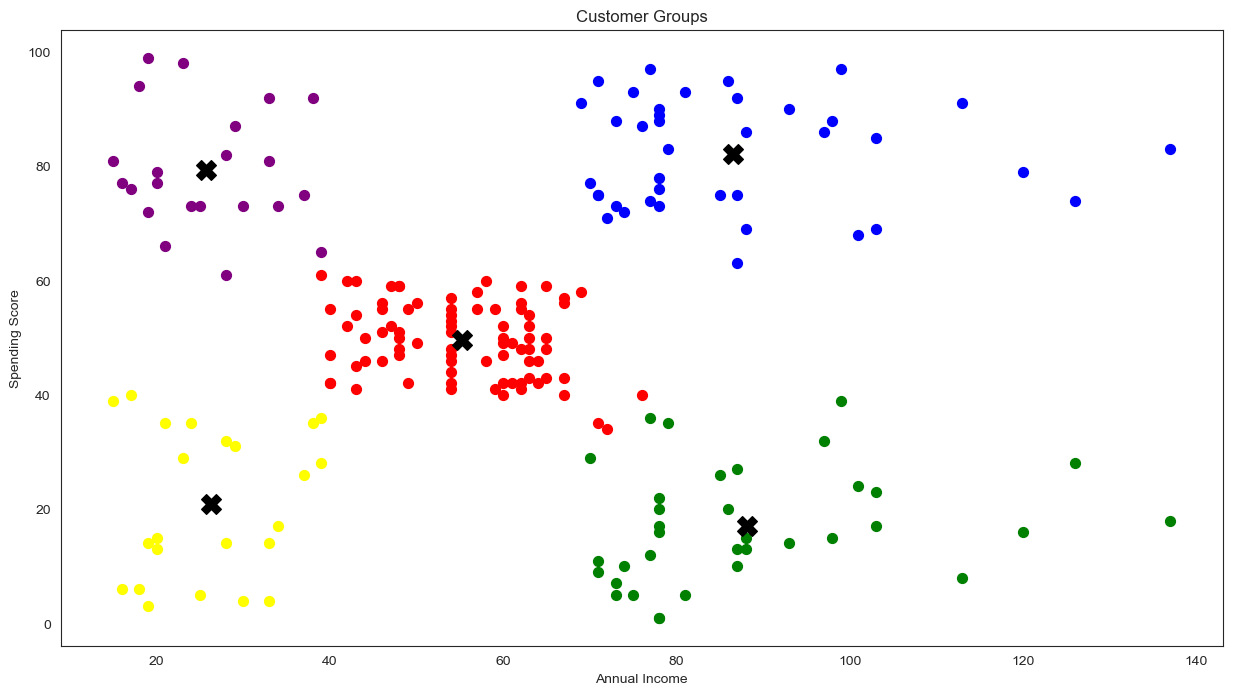

In [39]:
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='red',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='green',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='purple',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X')
# X represents the centroid of each cluster
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()